In [25]:
# Import required libraries
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset
dataset = pd.read_csv("vehicles.csv")

<h2>Data Cleaning</h2>

In [27]:
dataset.describe()

,id,price,year,odometer,county,lat,long
count,4.358490e+05,4.358490e+05,434732.000000,3.607010e+05,0.0,427614.000000,427614.000000
mean,7.115954e+09,1.349127e+05,2009.866460,9.897590e+04,NaN,38.404163,-94.961170
std,4.590854e+06,1.690857e+07,9.312503,1.134990e+05,NaN,6.036915,18.058561
min,7.096577e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-83.197100,-177.012000
25%,7.112450e+09,4.900000e+03,2007.000000,4.733300e+04,NaN,34.225700,-111.731000
50%,7.117092e+09,9.995000e+03,2012.000000,9.118800e+04,NaN,38.934800,-89.676700
75%,7.120090e+09,1.798900e+04,2015.000000,1.347360e+05,NaN,42.484500,-81.397300
max,7.121608e+09,3.647257e+09,2021.000000,1.000000e+07,NaN,79.601900,173.675000


From the above information, following are the observations:
<ol>
    <li>Number of entries in the dataset is close to 4,36000.</li>
    <li>In the price column, the minimum value is 0 which implies that there are free cars available. These entires should be removed from the dataset. Similarly, the maximum value is 3.6 billion which is clearly an outlier.</li>
    <li>The maximum value of odometer column is 10 million miles which should be again an outlier.</li>
    <li>The column "county" is totally empty.</li>
</ol>

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

There are many missing values in the dataset among the features.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

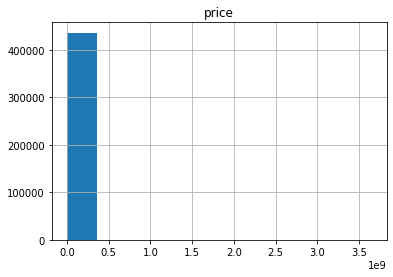

In [31]:
dataset.hist(column='price')

In [4]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.price >= Q1-1.5*IQR)&(dataset.price <= Q3+1.5*IQR)]

In [5]:
dataset.count()['id']

419878

<AxesSubplot:title={'center':'Distribution of the prices'}, xlabel='price'>

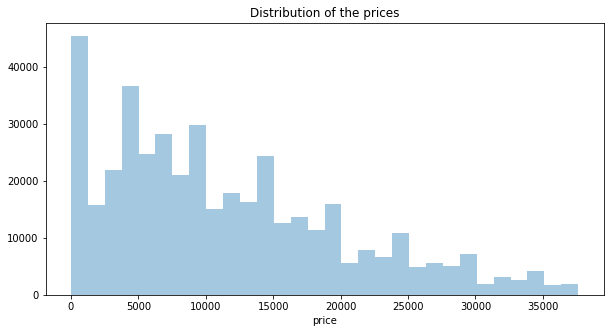

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the prices')
sns.distplot(dataset['price'], bins=30, kde=False)

In [7]:
dataset = dataset[dataset['price']>600]

In [8]:
Q1 = dataset['odometer'].quantile(0.25)
Q3 = dataset['odometer'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[dataset['odometer'] <= Q3 + 3*IQR]

In [9]:
dataset.drop(columns = ['id', 'url', 'region', 'region_url', 'title_status', 'vin', 'image_url', 'description', 'county', 'state', 'long', 'lat'], inplace=True)

In [10]:
dataset.drop(columns = ['manufacturer'], inplace=True)

In [11]:
dataset.shape

(316257, 12)

In [12]:
dataset.isnull().sum()*100/len(dataset)

price            0.000000
year             0.174225
model            0.862590
condition       36.541167
cylinders       31.878188
fuel             0.751288
odometer         0.000000
transmission     0.520463
drive           20.289511
size            65.134052
type            18.563067
paint_color     23.309840
dtype: float64

In [13]:
dataset.drop(columns = ['size'], inplace=True)

In [14]:
rm_rows = ['year', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
for column in rm_rows:
    dataset = dataset[~dataset[column].isnull()]

In [15]:
dataset.replace(np.nan, 'null', inplace=True)

In [16]:
dataset.isnull().sum()*100/len(dataset)

price           0.0
year            0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
dtype: float64